<a href="https://colab.research.google.com/github/BossAyush07/Deep-Learning-Projects/blob/master/Random_Forest_%26_Grid_Search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,r2_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Loading Dataset


In [4]:
data = pd.read_json("amsterdam.json")

In [5]:
data.head(10)

,host_listings_count,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,number_of_reviews,calculated_host_listings_count,price,latitude,longitude,room_type,instant_bookable
0,1.0,6,1.0,2.0,1,3,4,1,$145.00,52.361173,4.866755,Entire home/apt,f
1,1.0,2,1.0,1.0,1,2,17,1,$88.00,52.370237,4.859507,Entire home/apt,f
2,1.0,2,1.0,1.0,2,2,4,1,$130.00,52.362016,4.866872,Entire home/apt,f
3,2.0,4,1.0,2.0,2,4,2,2,$110.00,52.365826,4.858178,Entire home/apt,f
4,1.0,2,1.0,1.0,1,3,10,1,$115.00,52.364179,4.864885,Entire home/apt,f
5,1.0,1,1.0,1.0,1,1,11,1,$70.00,52.359753,4.866176,Private room,f
6,1.0,2,1.5,1.0,1,2,3,1,$120.00,52.367870,4.864129,Entire home/apt,f
7,1.0,2,1.0,1.0,1,1,33,1,$45.00,52.373410,4.865154,Private room,f
8,3.0,2,NaN,1.0,1,1,2,3,$45.00,52.373642,4.860513,Private room,f
9,1.0,4,1.0,2.0,4,2,13,1,$240.00,52.368691,4.873708,Entire home/apt,f


##Checking For null values

In [6]:
data.isnull().sum()

host_listings_count                3
accommodates                       0
bathrooms                         18
bedrooms                          12
guests_included                    0
minimum_nights                     0
number_of_reviews                  0
calculated_host_listings_count     0
price                              0
latitude                           0
longitude                          0
room_type                          0
instant_bookable                   0
dtype: int64

## Replacing Null values with median

In [7]:
data['bathrooms']=data['bathrooms'].fillna(data['bathrooms'].median())
data['bedrooms']=data['bedrooms'].fillna(data['bedrooms'].median())
data['host_listings_count']=data['host_listings_count'].fillna(data['host_listings_count'].median())


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15181 entries, 0 to 15180
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_listings_count             15181 non-null  float64
 1   accommodates                    15181 non-null  int64  
 2   bathrooms                       15181 non-null  float64
 3   bedrooms                        15181 non-null  float64
 4   guests_included                 15181 non-null  int64  
 5   minimum_nights                  15181 non-null  int64  
 6   number_of_reviews               15181 non-null  int64  
 7   calculated_host_listings_count  15181 non-null  int64  
 8   price                           15181 non-null  object 
 9   latitude                        15181 non-null  float64
 10  longitude                       15181 non-null  float64
 11  room_type                       15181 non-null  object 
 12  instant_bookable                

### now we have no null values in our data

## Replacing the special character($) from target variable price and changing type to float


In [9]:
data['price'] = data['price'].map(lambda x: x.lstrip('$').replace(',',''))
data['price']

0        145.00
1         88.00
2        130.00
3        110.00
4        115.00
          ...  
15176     80.00
15177    125.00
15178    435.00
15179     80.00
15180    200.00
Name: price, Length: 15181, dtype: object

In [10]:
data['price']=data['price'].astype('float')

## Checking the correlation between target variable and other variables

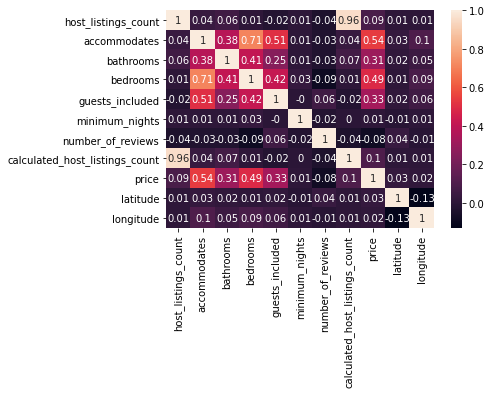

In [11]:
corr=data.corr().round(2)
sns.heatmap(corr,annot=True)

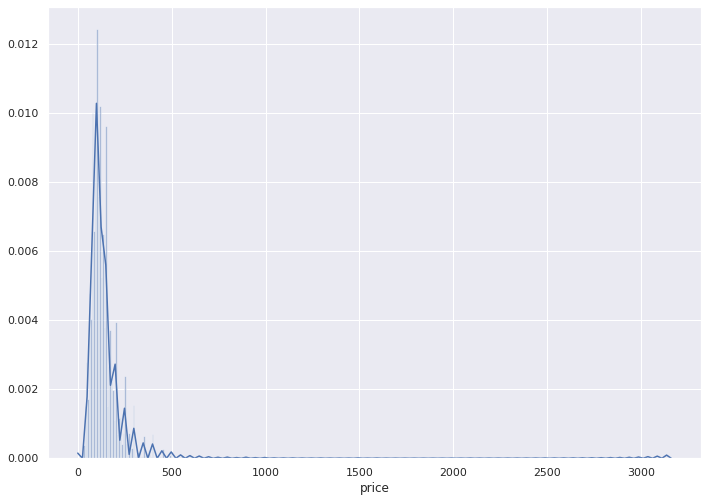

In [12]:
sns.set(rc={'figure.figsize':(11.7,8.3)})
sns.distplot(data['price'],bins=400)
plt.show()

## Removing all the columns which have less than 0.1 correlation with our target variable

In [13]:
data=data.drop(['host_listings_count','minimum_nights','number_of_reviews','latitude','longitude'], axis=1)
print(data)

       accommodates  bathrooms  ...        room_type  instant_bookable
0                 6        1.0  ...  Entire home/apt                 f
1                 2        1.0  ...  Entire home/apt                 f
2                 2        1.0  ...  Entire home/apt                 f
3                 4        1.0  ...  Entire home/apt                 f
4                 2        1.0  ...  Entire home/apt                 f
...             ...        ...  ...              ...               ...
15176             4        1.5  ...     Private room                 t
15177             2        1.0  ...  Entire home/apt                 t
15178            16        2.0  ...  Entire home/apt                 t
15179             4        1.5  ...  Entire home/apt                 f
15180             6        2.0  ...  Entire home/apt                 f

[15181 rows x 8 columns]


## Separating the categorical and numerical attributes

In [14]:
obj_col=data.select_dtypes(include=['object'])
print(obj_col)
rest_col=data.select_dtypes(exclude=['object'])
target=data['price']
rest_col=rest_col.drop(['price'],axis=1)
print(rest_col)

             room_type instant_bookable
0      Entire home/apt                f
1      Entire home/apt                f
2      Entire home/apt                f
3      Entire home/apt                f
4      Entire home/apt                f
...                ...              ...
15176     Private room                t
15177  Entire home/apt                t
15178  Entire home/apt                t
15179  Entire home/apt                f
15180  Entire home/apt                f

[15181 rows x 2 columns]
       accommodates  bathrooms  ...  guests_included  calculated_host_listings_count
0                 6        1.0  ...                1                               1
1                 2        1.0  ...                1                               1
2                 2        1.0  ...                2                               1
3                 4        1.0  ...                2                               2
4                 2        1.0  ...                1                 

## Encoding the categorical features

In [15]:
obj_col_encoded=pd.get_dummies(obj_col,prefix_sep='_',drop_first=True)
obj_col_encoded


,room_type_Private room,room_type_Shared room,instant_bookable_t
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
15176,1,0,1
15177,0,0,1
15178,0,0,1
15179,0,0,0


##Creating the final dataset

In [16]:
train_final=pd.concat([obj_col_encoded, rest_col], axis=1,sort=False)
train_final.head()

,room_type_Private room,room_type_Shared room,instant_bookable_t,accommodates,bathrooms,bedrooms,guests_included,calculated_host_listings_count
0,0,0,0,6,1.0,2.0,1,1
1,0,0,0,2,1.0,1.0,1,1
2,0,0,0,2,1.0,1.0,2,1
3,0,0,0,4,1.0,2.0,2,2
4,0,0,0,2,1.0,1.0,1,1


Splitting into train and test 

In [17]:
x_train,x_test,y_train,y_test=train_test_split(train_final,target,test_size=0.2)

##Applying Random Forest

In [18]:
regressor = RandomForestRegressor(n_estimators=200, random_state=0)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

In [19]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 38.07451169411729
Mean Squared Error: 4551.393975297162
Root Mean Squared Error: 67.46401985723325


## Performing Grid Search

In [20]:
reg=RandomForestRegressor(random_state=0)


In [21]:
param_grid = {
 'n_estimators': [200],
 'max_depth' : [5],
 'criterion' :['mse', 'mae']
}


In [22]:
reg_cv=GridSearchCV(estimator=reg, param_grid=param_grid)

In [23]:
reg_cv.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=0,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [24]:
print(reg_cv.best_params_)

{'criterion': 'mae', 'max_depth': 5, 'n_estimators': 200}


## fitting the model and selecting the parameters

In [25]:
reg2=RandomForestRegressor(criterion='mse',max_depth=5,n_estimators=200,random_state=0)

In [26]:
reg2.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

##Prediction and evaluation of output

In [27]:
prediction=reg2.predict(x_test)

In [28]:
r2=r2_score(y_test,prediction)
print(r2)

0.33207562193093665
